In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn import linear_regression

%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [152]:
#np.random.seed([0])
X =  np.random.normal(0,1,100)
epsilon = np.random.normal(0,.25,100)
print len(X)

100


In [153]:
# Creating a feature to simulate error term
# creating a response variable
Y = -1 + .5*X + epsilon

# Here True Beta_0 = -1 and True Beta_1 = .5 

In [154]:
# Data Frame consisting of feature and the simulated error
df = pd.DataFrame({'X':X , 'epsilon':epsilon,'Y':Y})
print len(df)

100


In [155]:
df.head()

,X,Y,epsilon
0,0.603406,-0.422110,0.276187
1,1.871531,0.003679,0.067914
2,0.838854,-0.434152,0.146421
3,1.038062,-0.202965,0.278004
4,1.293319,-0.774708,-0.421367


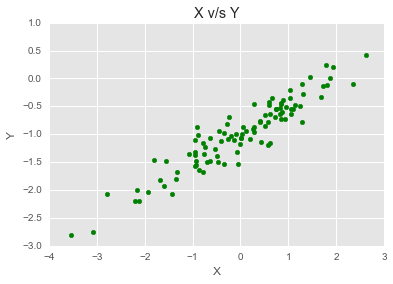

In [156]:
# Plotting the data for the relationship of X and Y
plt.scatter(x = df.X , y = df.Y , color = 'g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X v/s Y')

- As expected the relationship between X and Y is linear 
- it is not perfectly linear due to the presence of 'Noise' , the epsilon varibale

In [157]:
# Least square fit 
model_sm = smf.ols(formula = 'Y~X+epsilon', data = df).fit()

In [158]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.408e+31
Date:                Sat, 17 Sep 2016   Prob (F-statistic):               0.00
Time:                        04:43:37   Log-Likelihood:                 3365.3
No. Observations:                 100   AIC:                            -6725.
Df Residuals:                      97   BIC:                            -6717.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0000   5.97e-17  -1.68e+16      0.000        -1.000    -1.000
X              0.5000   5.07e-17   9.86e+15      0.000         0.500     0.500
epsilon        1.0000   2.76e-16   3.63e+15      0.000         1.000     1.000
==============================================================================
Omnibus:                        7.289   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.777
Skew:                          -0.589   Prob(JB):                       0.0338
Kurtosis:                       3.488   Cond. No.                         5.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# using the model to get the  predicted values
df['y_hat'] = model_sm.predict(df.X)

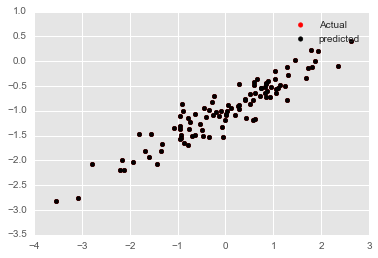

In [160]:
plt.scatter(x = df.X , y = df.Y , color = 'r',  label = 'Actual')
plt.scatter(x = df.X , y = df.y_hat , color = 'k' ,label = 'predicted')

plt.legend(loc = 'best')
plt.show()

In [161]:
df_new = df[['X','Y']]

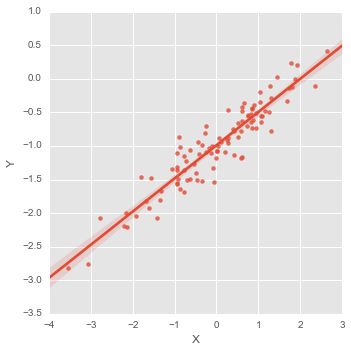

In [162]:
# PLotting the regression fit on X
g = sns.lmplot('X', 'Y', df)# plt.plot(df.X,df.y_hat)



#### Generating Quadratic fit on Data

In [166]:
X_2 = df.X**2 
epsilon = np.random.normal(0,.1,100)# This time the data has less noise
Y = Y = -1 + .5*X + epsilon
df_quad = pd.DataFrame({'X':X,'X_2':X_2,'Y':Y})

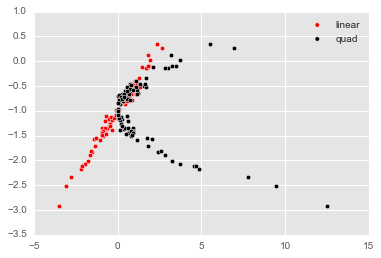

In [169]:
plt.scatter(x = df_quad.X , y = df_quad.Y , label = 'linear' , c = 'r' , zorder = 1)
plt.scatter(x = df_quad.X_2 , y = df_quad.Y , label = 'quad' , c = 'k' ,zorder = 1)
plt.legend(loc = 'best')


In [171]:
model_quad = smf.ols(formula = 'Y~X+X_2',data = df_quad).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sat, 17 Sep 2016   Prob (F-statistic):           7.00e-79
Time:                        05:12:06   Log-Likelihood:                 94.828
No. Observations:                 100   AIC:                            -183.7
Df Residuals:                      97   BIC:                            -175.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9913      0.012    -84.966      0.000        -1.014    -0.968
X              0.5006      0.009     58.780      0.000         0.484     0.517
X_2           -0.0049      0.005     -1.003      0.318        -0.015     0.005
==============================================================================
Omnibus:                        1.615   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.132
Skew:                           0.237   Prob(JB):                        0.568
Kurtosis:                       3.215   Cond. No.                         3.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note:
- Adding a polynomial value to data whose underlying relationship is linear reduces the fit
- The model confirms that the NULL hypothesis,H0, is true for a polynomial 

In [172]:
df_quad['y_hat'] = model_quad.predict(df[['X','X_2']])

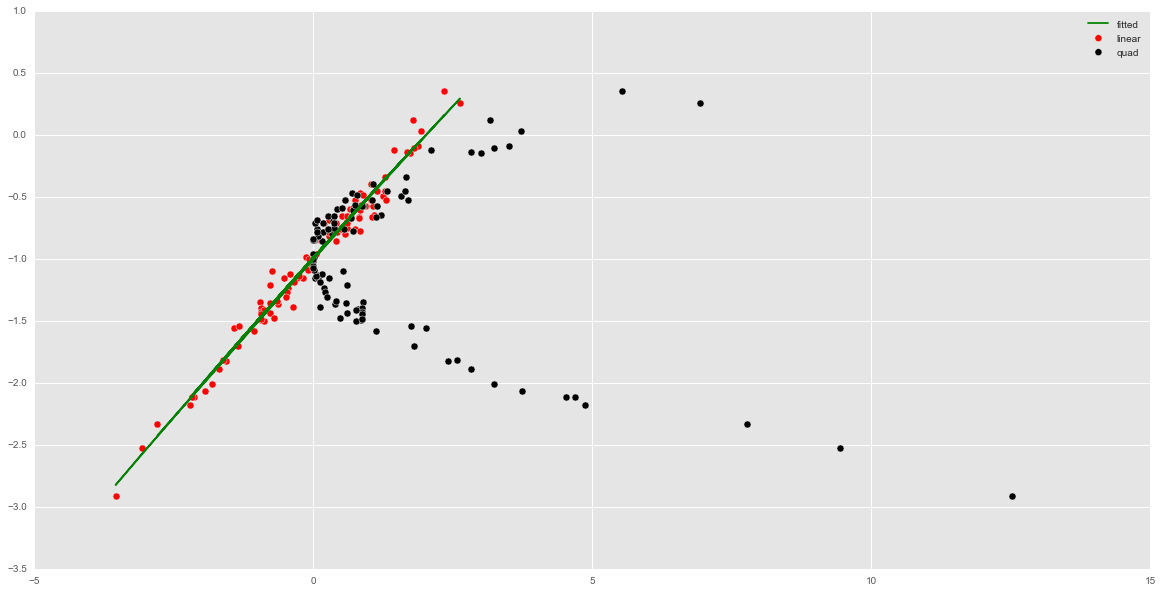

In [183]:
plt.figure(figsize=(20,10))
plt.hold(True)
plt.scatter(x = df_quad.X , y = df_quad.Y , label = 'linear' , c = 'r' , zorder = 1,s=50)
plt.scatter(x = df_quad.X_2 , y = df_quad.Y , label = 'quad' , c = 'k' ,zorder = 1,s=50)
plt.plot(df_quad.X ,  df_quad.y_hat , label = 'fitted' , c = 'g' , zorder = 2)
plt.legend(loc = 'best')

plt.show()

#### Reevaluating the for after changing the noise  in the data 

In [186]:
epsilon = np.random.normal(0,1,100) # The values of epsilon now ranges from 0,1
Y_new = Y = -1 + .5*X + epsilon
df_quad.Y = Y_new

In [187]:
# Modeling:
model_quad_noisy = smf.ols(formula = 'Y~X+X_2',data = df_quad).fit()
model_quad_noisy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     12.14
Date:                Sat, 17 Sep 2016   Prob (F-statistic):           1.96e-05
Time:                        05:31:32   Log-Likelihood:                -144.00
No. Observations:                 100   AIC:                             294.0
Df Residuals:                      97   BIC:                             301.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.8194      0.127     -6.446      0.000        -1.072    -0.567
X              0.4192      0.093      4.518      0.000         0.235     0.603
X_2           -0.0247      0.053     -0.464      0.644        -0.130     0.081
==============================================================================
Omnibus:                        1.137   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.816
Skew:                          -0.216   Prob(JB):                        0.665
Kurtosis:                       3.093   Cond. No.                         3.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
df_quad['y_hat_noisy'] = model_quad_noisy.predict(df[['X','X_2']])

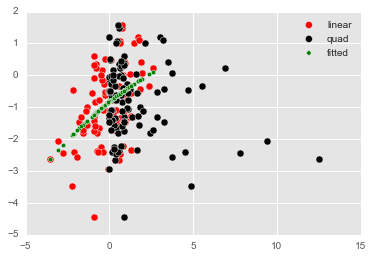

In [199]:
#plt.figure(figsize=(20,10))
plt.hold(True)
plt.scatter(x = df_quad.X , y = df_quad.Y , label = 'linear' , c = 'r' , zorder = 1,s=50)
plt.scatter(x = df_quad.X_2 , y = df_quad.Y , label = 'quad' , c = 'k' ,zorder = 1,s=50)
plt.scatter(x = df_quad.X , y=  df_quad.y_hat_noisy , label = 'fitted' , c = 'g' , zorder = 2)
plt.legend(loc = 'best')

plt.show()

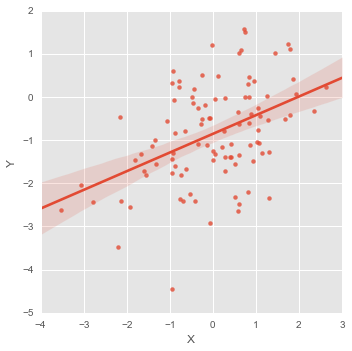

In [195]:
g = sns.lmplot('X' , 'Y' , df_quad)



## Conclusion


- The confidence interval for coefficients widens as we keep on increasing noise and add ploynomial values to the data that is essentially linear
- The quality of the fit goes down as we add 'noise' and unrelated data to the parameter